In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

In [11]:
pattern = r"\d{5}"
text_to_search = "I moved to Paris 75011, it's closer to my workplace."
re.findall(pattern, text_to_search)

['75011']

In [12]:
pattern = r"date of"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [13]:
pattern = r"\d{4}/\d{2}/\d{2}"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['2019/03/12', '2021/03/01']

In [14]:
date_pattern = r"\d{2}-\d{2}-\d{4}"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(date_pattern, text_to_search)

['15-02-2017']

# Part 1: Working with Regex

In [17]:
zip_code_pattern = r"\d{5}"
quantity_pattern = r"Quantity +\d+"
amount_pattern = r"Total Amount +\d+\.\d{2} €"
quantity_group_pattern = r"Quantity +(\d+)"
amount_group_pattern = r"Total Amount +(\d+\.\d{2}) €"

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex/tests
plugins: dash-1.19.0
collecting ... collected 6 items

test_patterns.py::TestPatterns::test_amount_group_pattern PASSED         [ 16%]
test_patterns.py::TestPatterns::test_amount_pattern PASSED               [ 33%]
test_patterns.py::TestPatterns::test_date_pattern PASSED                 [ 50%]
test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED       [ 66%]
test_patterns.py::TestPatterns::test_quantity_pattern PASSED             [ 83%]
test_patterns.py::TestPatterns::test_zip_code_pattern PASSED             [100%]

============================== 6 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/patterns.pickle

git commit -m 'Co

# Part 2: From a text file to a DataFrame

In [21]:
filepath = "data/receipts.txt"
with open(filepath, encoding="utf-8") as f:
    receipts_str = f.read()

In [23]:
receipts_list = receipts_str.split("====================================")
len(receipts_list)

100

In [27]:
receipts_dict = { 'date':[], 'amount':[], 'quantity':[] }

for receipt in receipts_list:
    date_pattern = r"\d{2}-\d{2}-\d{4}"
    date = re.findall(date_pattern, receipt)[0]
    amount_pattern = r"Total Amount +(\d+\.\d{2}) €"
    amount = re.findall(amount_pattern, receipt)[0]
    quantity_pattern = r"Quantity +(\d+)"
    quantity = re.findall(quantity_pattern, receipt)[0]
    receipts_dict["date"].append(date)
    receipts_dict["amount"].append(amount)
    receipts_dict["quantity"].append(quantity)


In [28]:
receipts_df = pd.DataFrame.from_dict(receipts_dict)
receipts_df.head()

,date,amount,quantity
0,02-01-2017,3097.00,163
1,05-01-2017,935.00,110
2,23-01-2017,2808.00,156
3,31-01-2017,4368.00,182
4,06-02-2017,1988.50,97


In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex/tests
plugins: dash-1.19.0
collecting ... collected 4 items

test_receipts.py::TestReceipts::test_receipt PASSED                      [ 25%]
test_receipts.py::TestReceipts::test_receipts_df_size PASSED             [ 50%]
test_receipts.py::TestReceipts::test_receipts_dict PASSED                [ 75%]
test_receipts.py::TestReceipts::test_receipts_list PASSED                [100%]

============================== 4 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master



# Part 3: Data Visualization

In [32]:
receipts_df['date'] = pd.to_datetime(receipts_df['date'], format="%d-%m-%Y")
receipts_df.sort_values('date', inplace=True)
receipts_df = receipts_df.set_index('date')

In [33]:
receipts_df["quantity"] = pd.to_numeric(receipts_df["quantity"])
receipts_df["amount"] = pd.to_numeric(receipts_df["amount"])

<AxesSubplot:xlabel='date'>

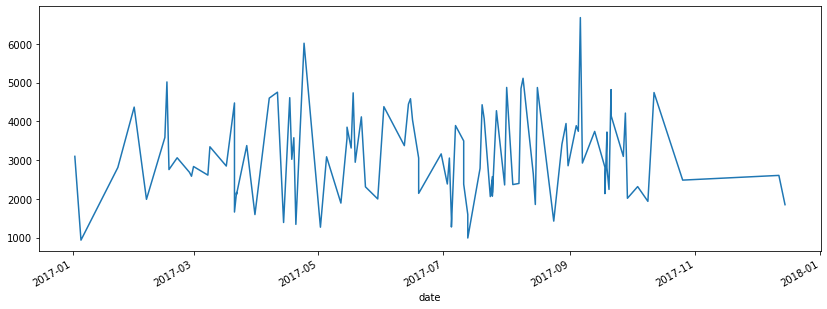

In [35]:
receipts_df['amount'].plot(figsize=(14,5))